<a href="https://colab.research.google.com/github/ahmed-elnakeeb/hope/blob/master/my_xl_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade ninja>>1
!pip install --upgrade torch>>1
!pip install "numpy>=1.17" "PyWavelets>=1.1.1" "opencv-python>=4.1.0.25"
!pip install --upgrade --no-deps invisible-watermark >>1
!pip install gradio >>1

!pip install  -U xformers
!pip install --upgrade transformers accelerate safetensors >>1
!pip install --upgrade diffusers >>1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.4 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline
import torch
import gc



In [3]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
# pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)



Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
def infer(prompt:str, negative:str="", scale:float=10, steps:int=50,seed:int=None, images:int=1):
  results=[]

  if seed and False:

    for i in range(0, images):
        generator = torch.Generator("cuda").manual_seed(seed)

        images = pipe(prompt=prompt,generator=generator, negative_prompt=negative, guidance_scale=scale, num_inference_steps=steps).images
        gc.collect()
        torch.cuda.empty_cache()
        results.append(images[0])
        seed+=1000
  else:

      for i in range(0, images):

        images = pipe(prompt=prompt,negative_prompt=negative, guidance_scale=scale, num_inference_steps=steps).images
        gc.collect()
        torch.cuda.empty_cache()
        results.append(images[0])
  return results[0]



In [ ]:
import gradio as gr
import cv2 as cv
# def infer(promt:str,negative:str,sg:int,steps:int,seed:int,images:int):
#     return cv.cvtColor(img, cv.COLOR_BGR2RGB)

examples = [
    [
        'A high tech solarpunk utopia in the Amazon rainforest',
        'low quality',
        9
    ],
    [
        'A pikachu fine dining with a view to the Eiffel Tower',
        'low quality',
        9
    ],
    [
        'A mecha robot in a favela in expressionist style',
        'low quality, 3d, photorealistic',
        9
    ],
    [
        'an insect robot preparing a delicious meal',
        'low quality, illustration',
        9
    ],
    [
        "A small cabin on top of a snowy mountain in the style of Disney, artstation",
        'low quality, ugly',
        9
    ],
]

block=gr.Blocks()
with block as demo:
    prombt=gr.Textbox(label="prombt")
    negative_prombt=gr.Textbox(label="negative prombt")
    gs=gr.Slider(1,100,label="scale",value=10)
    steps=gr.Slider(20,100,step=1,label="steps",value=50)
    seed=gr.Number(label="seed")
    number_images=gr.Slider(1,10,step=1,label="images")

    draw=gr.Button("draw")
    imout=gr.Image(label="output")

    inputs=[prombt,negative_prombt,gs,steps,seed,number_images]
    ouputs=[imout]

    draw.click(infer ,inputs=inputs,outputs=ouputs)

    clear_button = gr.ClearButton(label="Clear",components=inputs+ouputs)
    with gr.Row():
        ex = gr.Examples(examples=examples, fn=infer, inputs=inputs,outputs=ouputs, cache_examples=False)
        ex.dataset.headers = [""]
demo.queue()
demo.launch(server_port=102,debug=True,share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://77633e0e46aaf51525.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def infer2(prompt:str, negative:str="", scale:float=10, steps:int=50,seed:int=None, images:int=1):
  results=[]

  if seed and False:

    for i in range(0, images):
        generator = torch.Generator("cuda").manual_seed(seed)

        images = pipe(prompt=prompt,generator=generator, negative_prompt=negative, guidance_scale=scale, num_inference_steps=steps).images
        gc.collect()
        torch.cuda.empty_cache()
        results.append(images[0])
        seed+=1000
  else:
      for i in range(0, images):

        images = pipe(prompt=prompt,negative_prompt=negative, guidance_scale=scale, num_inference_steps=steps).images
        gc.collect()
        torch.cuda.empty_cache()
        results.append(images[0])
  return results[0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
inf=dict()
inf["prompt"] = "a logo for a company named ahmed "
inf["negative"]="bad anatomy, extra fingers"
inf["scale"]=10
# inf["seed"]=7987
inf["steps"]=10
# inf["height"]=1024
# inf["width"]=1024
inf["images"]=1
images=infer(**inf)


  0%|          | 0/10 [00:00<?, ?it/s]

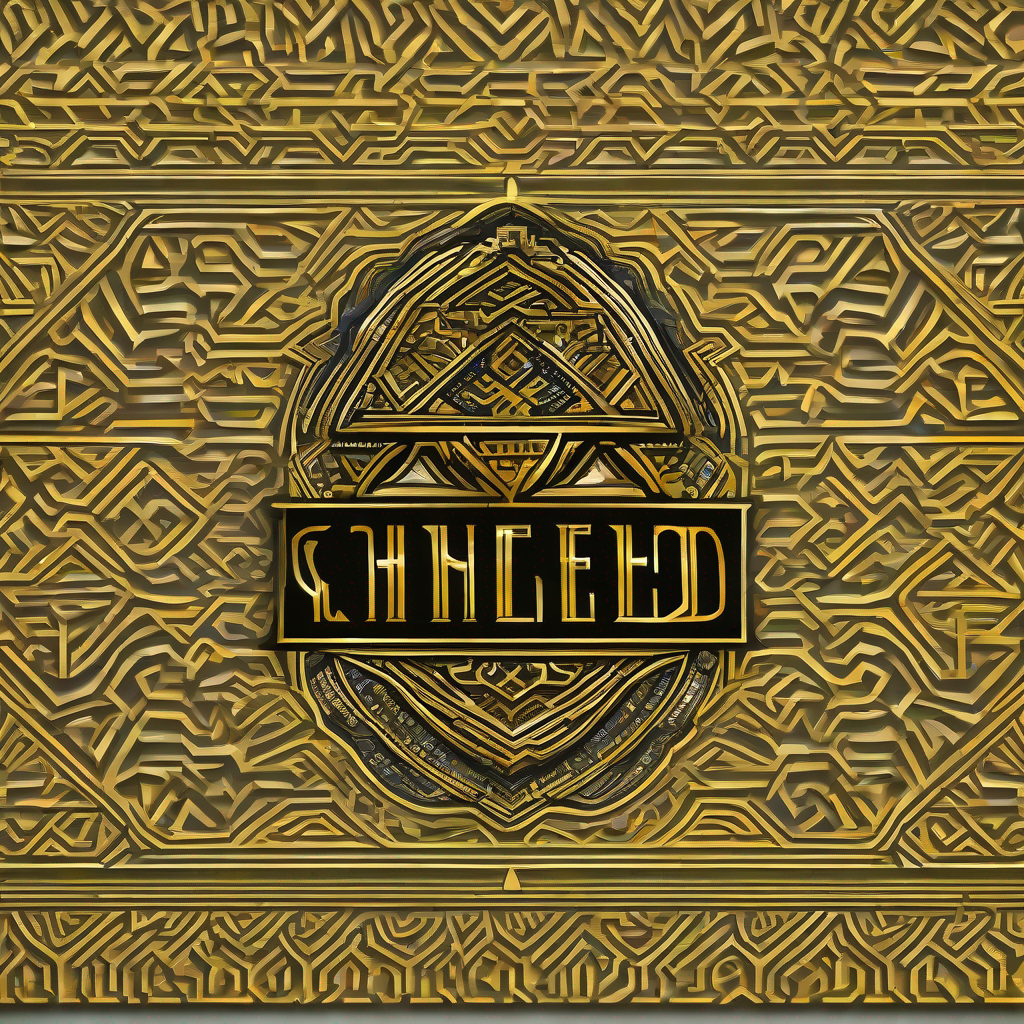

In [ ]:
from IPython.display import display

# Display the output of Stable Diffusion
for img in images:
    display(img)

In [ ]:
# products
products=["boy","shark toy identity"]
# Color schemes
color_schemes = ['red and black', 'blue and green', 'orange and yellow', 'black and white', 'purple and pink', 'green and blue', 'pink and purple', 'yellow and orange', 'red and white', 'blue and gray', 'black and gold', 'brown and beige', 'gray and yellow']

# Typography
typography = ['serif', 'sans-serif', 'script', 'bold', 'italic', 'slab serif', 'display', 'handwriting', 'light', 'heavy', 'condensed', 'extended']

# Styles
styles = ['modern', 'vintage', 'minimalist', 'abstract', 'geometric', 'retro', 'futuristic', 'hand-drawn', 'organic', 'industrial', 'grunge', 'elegant']

# Types
types = ['monogram logos', 'wordmark logos', 'pictorial mark logos', 'abstract logo marks', 'mascot logos','emblem logos','negative space logos','dynamic logos','3D logos','animated logos','minimalist logos']
# init_seed=0
r=1
for product in products:
  for color in color_schemes:
    # for typograph in typography:
      for style in styles:
        for typ in types:
          for _ in range (r):
            try:
              inf=dict()
              # inf["prompt"] =f"a {product} for a company named Elnakeeb (NKB for short), color scheme: {color}, typograghy: {typograph}, style: {style}, type: {typ}"
              inf["prompt"] =f"a {product} for a company named Elnakeeb (NKB for short), color scheme: {color}, style: {style}, type: {typ}"
              # inf["negative"]="bad anatomy, extra fingers"
              inf["scale"]=10
              # inf["seed"]=7987
              inf["steps"]=50
              # inf["height"]=1024
              # inf["width"]=1024
              inf["images"]=2
              images=infer(**inf)
              c=1
              for img in images:
                img.save(f"drive/MyDrive/xl/NKB/{inf['prompt']} c{c}.png")
                c+=1
            except :
              print( inf["prompt"])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# refiner

In [ ]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image

pipe_images = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe_images = pipe_images.to("cuda")
url = "https://i.pinimg.com/originals/39/49/b7/3949b742d955db0e8b5277a77994a5d9.jpg"

init_image = load_image(url).convert("RGB")
prompt = "naruto"
image = pipe_images(prompt, image=init_image).images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
url = "https://i.pinimg.com/originals/39/49/b7/3949b742d955db0e8b5277a77994a5d9.jpg"

init_image = load_image(url).convert("RGB")
prompt = "kid naruto low res"
generator = torch.Generator("cuda").manual_seed(2)

gc.collect()
image = pipe_images(prompt,num_inference_steps=100,image=init_image,).images[0]

TypeError: ignored

In [ ]:
!nvcc --version



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!nvidia-smi

Thu Aug 10 17:09:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip freeze --all |grep torch

torch @ https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=a7a49d459bf4862f64f7bc1a68beccf8881c2fa9f3e0569608e16ba6f85ebf7b
torchaudio @ https://download.pytorch.org/whl/cu118/torchaudio-2.0.2%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=26692645ea061a005c57ec581a2d0425210ac6ba9f923edf11cc9b0ef3a111e9
torchdata==0.6.1
torchsummary==1.5.1
torchtext==0.15.2
torchvision @ https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp310-cp310-linux_x86_64.whl#sha256=19ca4ab5d6179bbe53cff79df1a855ee6533c2861ddc7389f68349d8b9f8302a
